In [76]:
# Nmae : Himanshu Agarwal , Net id: HXA180027 ,  
#q2.2 Titanic dataset
#mporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
#import data using the pandas libraries.
titanic3_dataset = pd.read_csv('titanic3.csv')
titanic3_dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


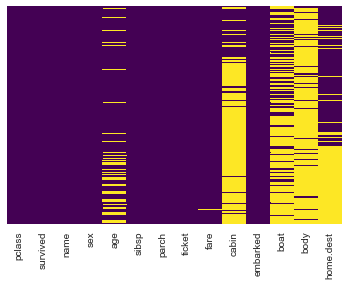

In [78]:
#Heatmap to check the missig values
sns.heatmap(titanic3_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

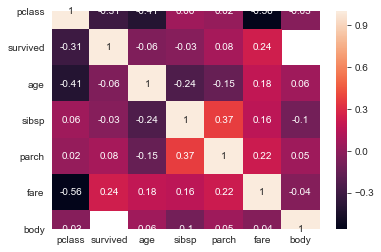

In [79]:
# create a correlation matrix that measures the linear relationships between the variables.
#The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
#We will use the heatmap function from the seaborn library to plot the correlation matrix
correlation_matrix = titanic3_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [80]:
#Through Correlation matrix we can see that few columns are not present which shows they are independent and has no correlation. 
#We can drop those features as they will not play any role in deciding the target feature. 
#So dropping features 'Cabin','body','boat', and 'home.dest'.Same way name and ticket.

In [81]:
titanic3_dataset.drop('cabin',axis=1,inplace=True)
titanic3_dataset.drop('body',axis=1,inplace=True)
titanic3_dataset.drop('boat',axis=1,inplace=True)
titanic3_dataset.drop('home.dest',axis=1,inplace=True)


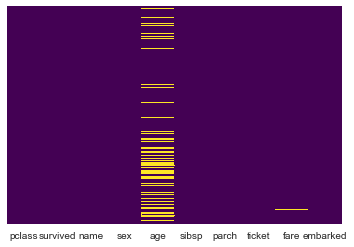

In [82]:
#Heatmap to check the missig values
sns.heatmap(titanic3_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [83]:
#Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for 
#reasonable replacement with some form of imputation.



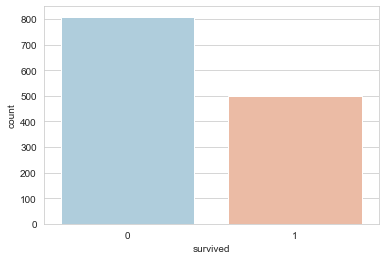

In [84]:
#Data Visualization
#using count plot checking how many passangers survived 
sns.set_style('whitegrid')
sns.countplot(x='survived',data=titanic3_dataset,palette='RdBu_r')


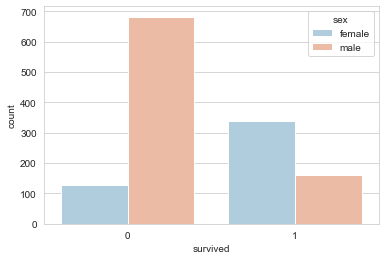

In [85]:
#using count plot checking how many passangers of different genders survived 
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=titanic3_dataset,palette='RdBu_r')


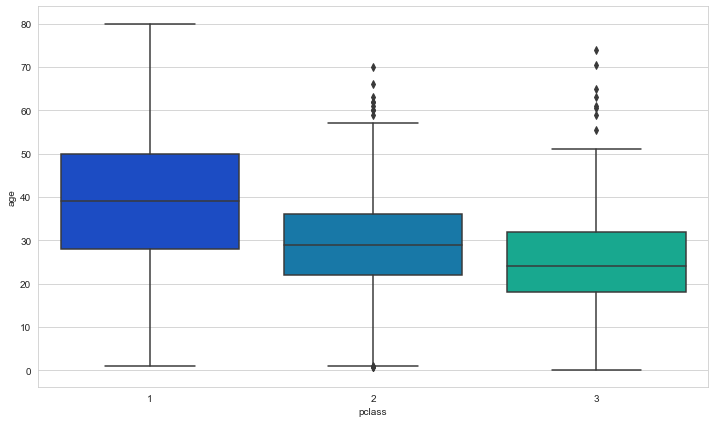

In [86]:
#Data cleaning  
#using box plot checking class wise average age of passangers 
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=titanic3_dataset,palette='winter')


In [87]:
#fill in missing age data instead of just dropping the missing age data rows
#One way to do this is by filling in the mean age of all the passengers (imputation). 
#However we can be smarter about this and check the average age by passenger class.

In [88]:
#Method to get the average age for a class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [89]:
#imputing the missing age values for each class.
titanic3_dataset['age'] = titanic3_dataset[['age','pclass']].apply(impute_age,axis=1)

#to see the count of the missing values left in eachh column
titanic3_dataset.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
dtype: int64

In [90]:
#As the number of rows with null data for fare and embarked are too low as compared to total size of the dataset, so we can drop them.
titanic3_dataset.dropna(inplace=True)


In [91]:
#We’ll need to convert categorical features to dummy variables using pandas! Like 'sex' and 'embarked' features.
#Otherwise our machine learning algorithm won’t be able to directly take in those features as inputs.
#the 'Name' and 'Ticket' column have no relationship with whether the person survived or not,observed using correlation matrix.
#So we drop these 2 columns and we convert the other two columns into numerical values


In [92]:

sex = pd.get_dummies(titanic3_dataset['sex'],drop_first=True)
embark = pd.get_dummies(titanic3_dataset['embarked'],drop_first=True)
titanic3_dataset.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)


In [93]:
#Data is ready to apply Logistic regression
titanic3_dataset.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.00,0,0,211.3375
1,1,1,0.92,1,2,151.5500
2,1,0,2.00,1,2,151.5500
3,1,0,30.00,1,2,151.5500
4,1,0,25.00,1,2,151.5500


In [94]:
#Preprocessing of Data for logistic regression

In [95]:
#train the model with 80% of the samples and test with the remaining 20%. #We do this to assess the model’s performance on unseen data. 
n = int(len(titanic3_dataset)*0.80)
#spliting data in training and test set in the ration of 80% and 20% respectively
df_train, df_test = titanic3_dataset.iloc[:n, :], titanic3_dataset.iloc[n:, :]
titanic3_dataset.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [96]:
# Initial Coefficients

B = np.array([0, 0, 0, 0, 0, 0]) #Weights array 
alpha = 0.0001 # Learning rate

In [97]:
#Spliting the training and testing data in X,Y train and test sets.
dt = df_train
m = len(df_train.iloc[:,:-1])
x0 = np.ones(m)
Xtrain = np.array([x0, dt['pclass'],dt['age'],dt['sibsp'],dt['parch'],dt['fare']]).T
ytrain = np.array(dt['survived'])

m = len(df_test.iloc[:,:-1])
x0 = np.ones(m)
dt= df_test
Xtest= np.array([x0, dt['pclass'],dt['age'],dt['sibsp'],dt['parch'],dt['fare']]).T
ytest= np.array(dt['survived'])

In [98]:
#Cost function 
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [99]:
#Sigmoid fuction to get the result in 0-1 range
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [100]:
#we are implementing SGD, we will pick up random K points from the data to find our optimal W and b. Thus for every iteration, 
#we need to iterate the gradient(derivative) calculations and we will update our W and for n_iteration times.

In [101]:
#mplementation of Logistic regression for the given numbers of iterations.
def gradient_descent(titanic3_data, B, alpha, iterations):
    cost_history = [0] * iterations
    
    k=10 #mini batch size
    for iteration in range(iterations):
       
        # Sampling the dataset, getting k random records
        dt= titanic3_data.sample(k)
        m = k
        x0 = np.ones(m)
        #Getting X and Y, from the random sample of size k.
        X1 = np.array([x0, dt['pclass'],dt['age'],dt['sibsp'],dt['parch'],dt['fare']]).T
        Y1 = np.array(dt['survived'])
        z = X1.dot(B)
        h = sigmoid(z)   #Calcultating the sigmoid of the  hypothesis
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y1
        # Gradient Calculation
        gradient = X1.T.dot(loss) /k
        # Changing Values of B using Gradient
        B = B - alpha * (gradient)
        # New Cost Value
        cost = cost_function(X1, Y1, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [102]:
alpha= 0.001 #learning rate
iterations=10000 #Number of epocks\number odf iterartion
theta , cost = gradient_descent(df_train, B, alpha, iterations)  #Calling the imlemented function to get the weights(theta) for each feaure and also the total cost incurred.

In [103]:
#Method to predict the value of output feature based on the weights received after training. 
def predict(X, theta):
        return sigmoid(np.dot(X, theta)).round()

In [104]:
#using scikit-learn’s Libraries to get the reports.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


predictions_train = predict(Xtrain,theta) # Making prediction on training set
print("Classification Report on Training data")
print(classification_report(ytrain,predictions_train))  
print("Accuracy on Training data:",accuracy_score(ytrain, predictions_train))

Classification Report on Training data
              precision    recall  f1-score   support

           0       0.64      0.92      0.75       601
           1       0.72      0.30      0.42       443

    accuracy                           0.65      1044
   macro avg       0.68      0.61      0.59      1044
weighted avg       0.67      0.65      0.61      1044

Accuracy on Training data: 0.6532567049808429


In [105]:
predictions_test = predict(Xtest,theta) # Making prediction on test set
print("Classification Report on test data")
print(classification_report(ytest,predictions_test))  
print("Accuracy on test data:",accuracy_score(ytest, predictions_test))

Classification Report on test data
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       207
           1       0.12      0.02      0.03        55

    accuracy                           0.77       262
   macro avg       0.46      0.49      0.45       262
weighted avg       0.65      0.77      0.69       262

Accuracy on test data: 0.767175572519084
